# Fuzzification of variables for predicting depression

This is an example of how the parameters were fuzzified in the paper: "A fuzzy inference system for predicting depression risk levels" (see reference 11). The rules and data for this particular paper were not freely available, so this program only shows how the antecedetns and consequent were fuzzified. 

In [1]:
import numpy as np

import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
import matplotlib
%matplotlib inline

In [3]:
print(fuzz.__version__)

0.4.2


The inputs(antecedents) used in the paper were Age, Body Mass Index, Systolic Blood Pressure, and PHQ-9 scores(a patient health questionnaire used in diagnosing depression). The output(consequent) was depression risk. The range of allowable values reflects that which was used in the paper

In [4]:
phq9   = ctrl.Antecedent(np.arange(0,27,1), 'phq9')
age = ctrl.Antecedent(np.arange(20,100,1), 'age')
bmi = ctrl.Antecedent(np.arange(15,40,1), 'bmi')
sbp = ctrl.Antecedent(np.arange(90,280,1), 'sbp')
depRisk = ctrl.Consequent(np.arange(0,1,0.01), 'depRisk')

These Membership Functions reflect how depression is diagnosed using the PHQ-9 Questionnaire(source: https://med.stanford.edu/fastlab/research/imapp/msrs/_jcr_content/main/accordion/accordion_content3/download_256324296/file.res/PHQ9%20id%20date%2008.03.pdf ), and share the same labels used in the paper

In [5]:
phq9['mild'] = fuzz.trimf(phq9.universe, [0,0,9])

phq9['moderate'] = fuzz.trimf(phq9.universe, [0,11,20])

phq9['severe'] = fuzz.trimf(phq9.universe, [13,21,27])

C:\Users\jkill\Anaconda3\envs\cs540aima\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


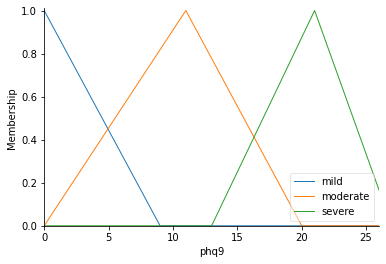

In [6]:
phq9.view()

These Membership functions are my own subjective opinion, but share the same labels used in the paper

In [7]:
age['young'] = fuzz.trimf(age.universe, [20,20,50])

age['middle-aged'] = fuzz.trimf(age.universe, [25,45,70])

age['old'] = fuzz.trapmf(age.universe, [50,70,100,100])

C:\Users\jkill\Anaconda3\envs\cs540aima\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


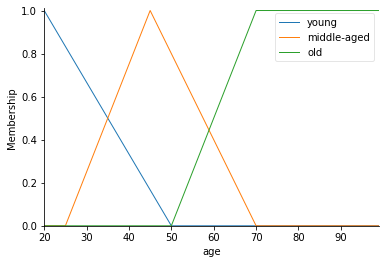

In [8]:
age.view()

These Membership Functions reflect the chart for determining BMI, and share the same labels as used in the paper

In [9]:
bmi['low'] = fuzz.trimf(bmi.universe, [15,15,22])

bmi['normal'] = fuzz.trimf(bmi.universe, [15,22,29])

bmi['high'] = fuzz.trapmf(bmi.universe, [22,29,40,40])

C:\Users\jkill\Anaconda3\envs\cs540aima\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


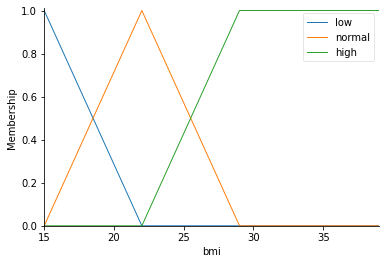

In [10]:
bmi.view()

These Membership functions reflect the categories of systolic blood pressure based on current medical consensus(source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings ). The categories reflect those used in the paper, although the upper range used in the paper seems uncessarily high)

In [11]:
sbp['low'] = fuzz.trapmf(sbp.universe, [90,90,105,120])

sbp['normal'] = fuzz.trapmf(sbp.universe, [105,120,130,140])

sbp['high'] = fuzz.trapmf(sbp.universe, [130,140,150,160])

sbp['very high'] = fuzz.trapmf(sbp.universe, [150,160,280,280])

C:\Users\jkill\Anaconda3\envs\cs540aima\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


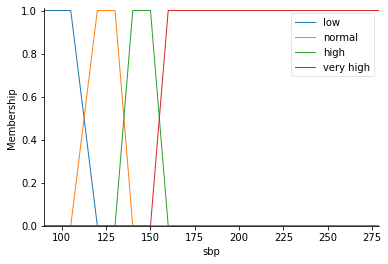

In [12]:
sbp.view()

These Membership functions reflect those used in the paper, and share the same labels

In [13]:
depRisk['Near Absent'] = fuzz.trapmf(depRisk.universe, [0,0,0.15,0.25])
depRisk['Mild'] = fuzz.trapmf(depRisk.universe, [0.15,0.25,0.35,0.45])
depRisk['Moderate'] = fuzz.trapmf(depRisk.universe, [0.35,0.45,0.55,0.65])
depRisk['Severe'] = fuzz.trapmf(depRisk.universe, [0.55,0.65,0.75,0.85])
depRisk['Very Severe'] = fuzz.trapmf(depRisk.universe, [0.75,0.85,1,1])

C:\Users\jkill\Anaconda3\envs\cs540aima\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


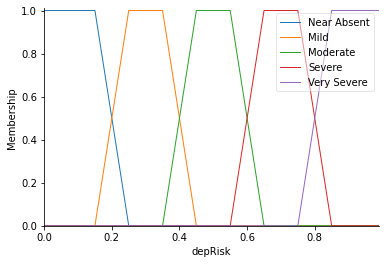

In [14]:
depRisk.view()